In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
with open("maps/map_400_points.npy", "rb") as f:
    map_data = np.load(f)

In [10]:
# Should be 1.77
expected_x = 1.77
leftmost_x = map_data[200+np.argmin(np.abs(map_data[200:, 1] - 2.0))]
rightmost_x = map_data[np.argmin(np.abs(map_data[:, 1] - 2.0))]

real_x = rightmost_x[0] - leftmost_x[0]
real_x

1.4350983522590024

In [11]:
short_coeff_x = expected_x/real_x
short_coeff_x

1.2333649447885058

In [12]:
new_traj_x = [(point[0]-leftmost_x[0])*short_coeff_x + leftmost_x[0] for point in map_data]

In [13]:
# Should be 2.40
expected_y = 2.40
bottom_y = map_data[np.argmin(np.abs(map_data[:, 0] - 0.7))]
top_y = map_data[np.argmin(np.abs(map_data[:100, 0] - 0.7))]

real_y = top_y[1] - bottom_y[1]
real_y

2.709130292984435

In [14]:
short_coeff_y = expected_y/real_y
short_coeff_y

0.8858931614382081

In [15]:
new_traj_y = [(point[1]-bottom_y[1])*short_coeff_y + bottom_y[1] for point in map_data]

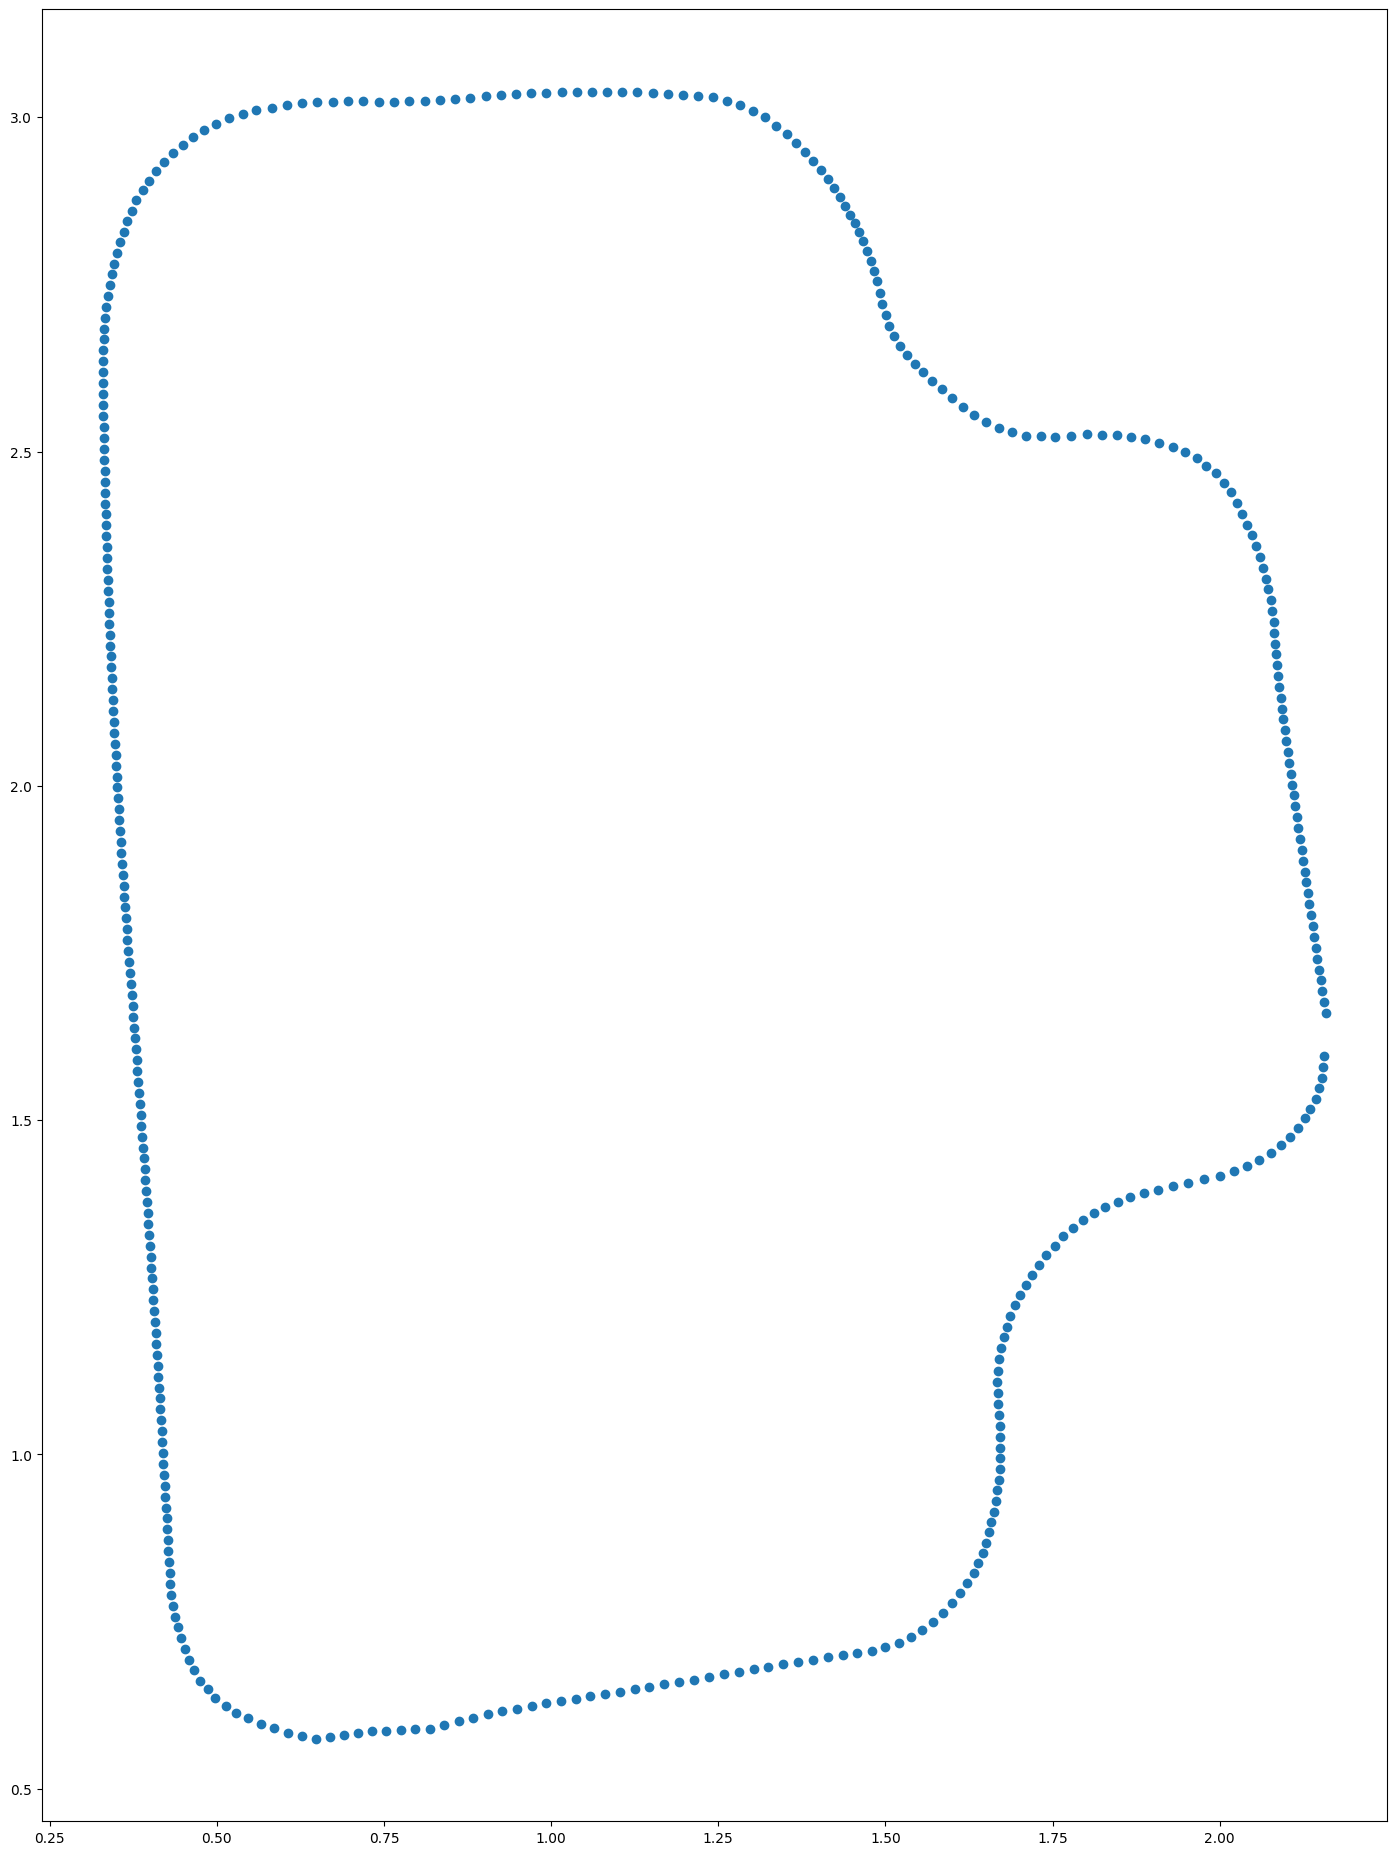

In [16]:
plt.figure(figsize=(30, 24), dpi=100)
plt.scatter(new_traj_x, new_traj_y)
plt.gca().set_aspect('equal')

In [17]:
result = np.array([new_traj_x, new_traj_y]).T

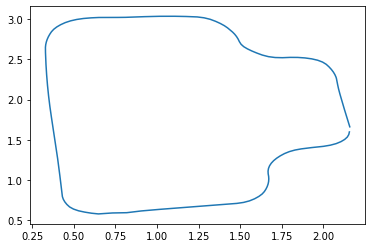

In [18]:
plt.plot(*result.T)

In [19]:
with open('map_400_fixed.npy', 'wb') as f:
    np.save(f, result)

In [22]:
long_side, short_side = 2.36, 1.77
env_long_len, env_short_len = 2.925, 2.34
env_long_border, env_short_border = (env_long_len-long_side)/2, (env_short_len-short_side)/2

scale_x = short_side / (rightmost_x[0] - leftmost_x[0])
scale_y = long_side / (top_y[1] - bottom_y[1])

scale_x, scale_y

(1.2333649447885058, 0.8711282754142379)

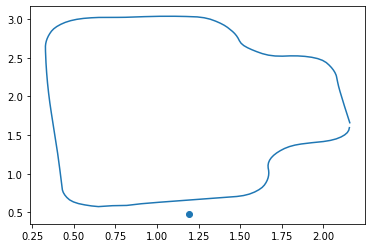

In [28]:
plt.plot(*result.T)
plt.scatter(1.19, 0.48)